**IMPORTING ESSENTIAL LIBRARIES**

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

**BASIC DATA EXPLORATION**

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**VISUALIZATION OF BOXPLOTS**

<Axes: xlabel='Annual Income (k$)'>

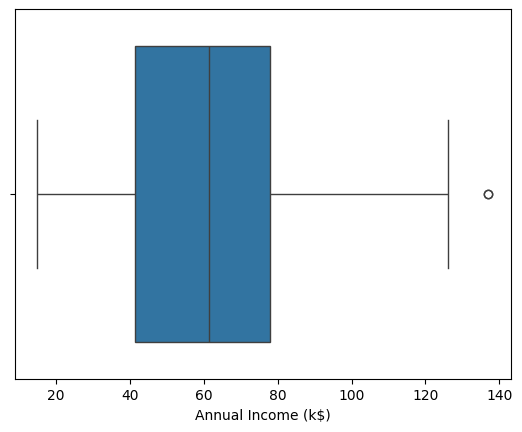

In [12]:
sns.boxplot(x=df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)'>

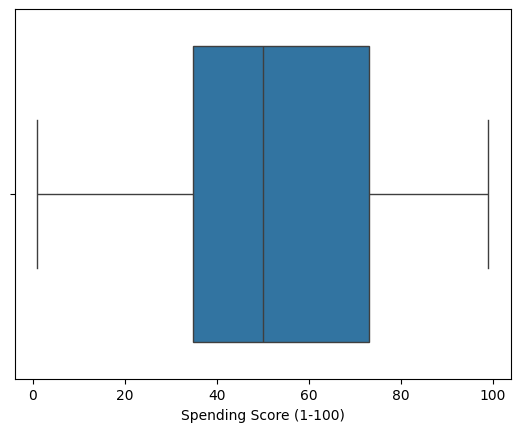

In [13]:
sns.boxplot(x=df['Spending Score (1-100)'])

<Axes: ylabel='Age'>

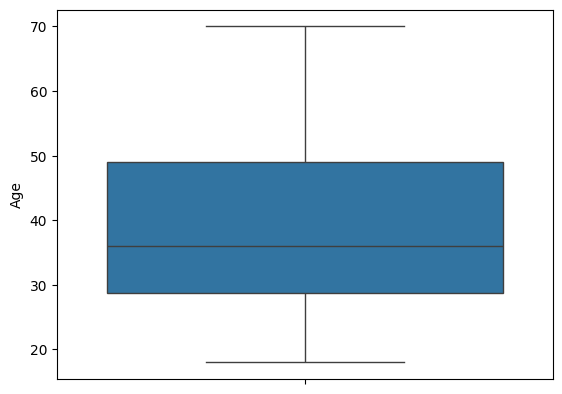

In [14]:
sns.boxplot(df['Age'])

**SELECTION OF FEATURES FOR ANOMALY DETECTION**

In [9]:
feature1 = 'Annual Income (k$)'
feature2 = 'Spending Score (1-100)'
feature3 = 'Age'
features = df[[feature1, feature2, feature3]]

**STANDARDIZATION OF THE DATASET**

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(features)


**CREATION AND FITTING OF A MODEL**

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

**SETTING THE CLUSTERING RANGE**

In [20]:
distances = kmeans.transform(X).min(axis=1)


**SETTING THE THRESHOLD RANGE**

In [21]:
threshold = np.percentile(distances, 95)
anomalies = distances > threshold


**CREATING A FEATURE ANOMALY**

In [22]:
df['anomaly'] = anomalies


**SCATTERPLOT VISUALIZATION**

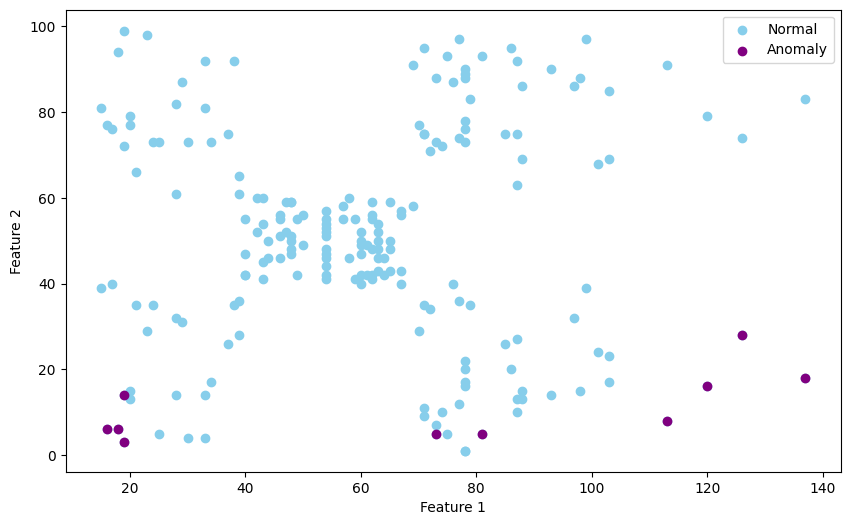

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], c='skyblue', label='Normal')
plt.scatter(df.loc[df['anomaly'], feature1], df.loc[df['anomaly'], feature2], c='purple', label='Anomaly')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**CREATING A NEW CSV FILE FOR THE ANOMALIES**

In [24]:
df.to_csv('anomalies_in_mall_customers.csv', index=False)
